In [1]:
# import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import inspect
import csv
import src.tuning as t
import pickle

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

# Online Communication Network Data

In [18]:
# Instantiate tuning class
tuning =  t.GridSearch()

/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:19: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nomination data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:114: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  super(GridSearch, self).__init__()
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:20: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/t

## 1. Grid search: crude (400 parameter combinations)


In [3]:
# specify parameter space for grid search
seq = np.arange(0,1.05,0.05)
seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])

# specify parameter space for grid search
i_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
t_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])

#t_seq = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

### 1.1 Run grid search simulations

In [4]:
# Run simulation
result_error, result_errorY3, result_m_error,\
result_child, result_cl = tuning.execute(t_range=t_seq,
                                         i_range=i_seq,
                                         t=2000,
                                         population_name='communication')

# Save model output
file = open('../output/tuning/com_output_error_revised_1.obj', 'wb')
pickle.dump(result_error, file)

file = open('../output/tuning/com_output_errorY3_revised_1.obj', 'wb')
pickle.dump(result_errorY3, file)

file = open('../output/tuning/com_output_m_error_revised_1.obj', 'wb')
pickle.dump(result_m_error, file)

file = open('../output/tuning/com_output_child_revised_1.obj', 'wb')
pickle.dump(result_child, file)

file = open('../output/tuning/com_output_cl_revised_1.obj', 'wb')
pickle.dump(result_cl, file)

thres_PA: 0.001 I_PA: 0.001 error: 1.0210110432962871 0.8110672178995547 0.012260071032744041 runtime: 20.616324186325073
thres_PA: 0.001 I_PA: 0.05 error: 18.5750738245216 14.510462441617205 1.2134827010183395 runtime: 21.1354501247406
thres_PA: 0.001 I_PA: 0.1 error: 21.2735216181576 16.662748820635173 1.416257364422672 runtime: 20.045493841171265
thres_PA: 0.001 I_PA: 0.15 error: 22.4889888356779 17.607774432315757 1.501969250415446 runtime: 19.751614332199097
thres_PA: 0.001 I_PA: 0.2 error: 22.955953227870644 17.98135557016679 1.5374573647780179 runtime: 19.38603901863098
thres_PA: 0.001 I_PA: 0.25 error: 23.302181755136928 18.275280620850523 1.561620196350269 runtime: 18.97016191482544
thres_PA: 0.001 I_PA: 0.3 error: 23.54242292335141 18.440444511964387 1.5797048353330339 runtime: 19.24213194847107
thres_PA: 0.001 I_PA: 0.35 error: 23.750295209513034 18.600333982577453 1.5921961816455887 runtime: 18.961843967437744
thres_PA: 0.001 I_PA: 0.4 error: 23.921702719036652 18.704847656

### 1.2 Sum of Squared Errors

Text(0.5, 105.0, 'I PA')

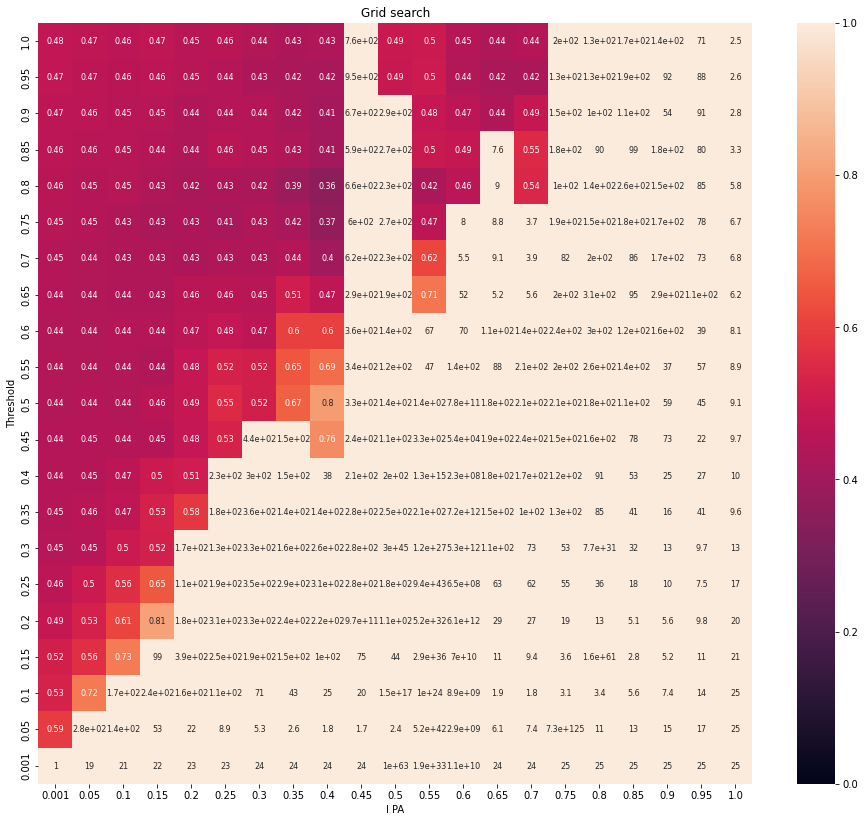

In [5]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)

# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')


In [6]:
plt.savefig('../output/tuning/grid_search1_error_communication_revised.eps', bbox_inches='tight', format='eps', dpi=1000)



<Figure size 432x288 with 0 Axes>

### 1.3 Proportion participants changing PAL

In [7]:
# Checking proportion of participants changing PAL

proplist = []

for dat in result_child:
    datlist = []
    for key in dat:
        datlist.append(dat[key])

    res_ind = pd.concat(datlist, axis=1)
    dif = res_ind.iloc[1999] - res_ind.iloc[0]
    proplist.append(dif[dif != 0].count()/dif.count())

prop = pd.DataFrame(proplist)

result_prop = pd.DataFrame(result_error)

result_prop["prop"] = prop

prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")


Text(0.5, 105.0, 'I PA')

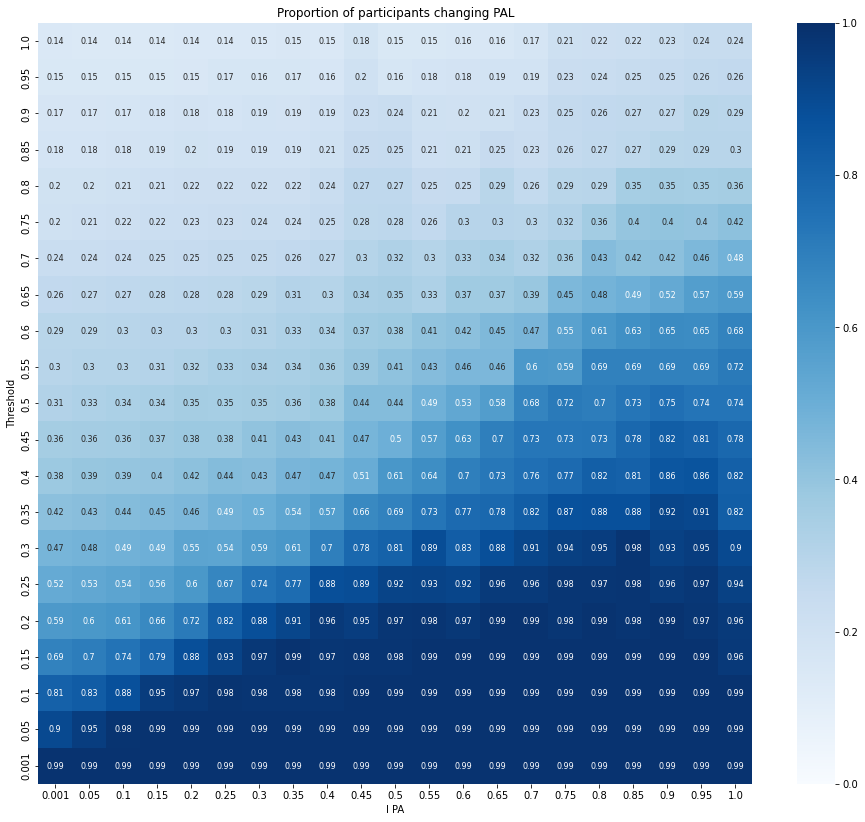

In [8]:
# plot heatmap of proportion changing PAL
plt.figure(figsize=((16,14)))
plt.title('Proportion of participants changing PAL')
sns.heatmap(prop_df, cmap="Blues", annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')



In [9]:
# Save plot
plt.savefig('../output/tuning/grid_search1_proportion_communication_revised.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

## 2. Grid search: subspace (800 parameter combinations)

In [10]:
# specify parameter space for grid search
#t_seq = np.arange(0.025,1.025,0.025)
#i_seq = np.arange(0.001,0.051,0.001)

#i_seq1 = np.array([0.001])
#i_seq2 = np.arange(0.005,0.505,0.005)
#i_seq = np.concatenate((i_seq1, i_seq2))

#t_seq = np.arange(0.01,0.31,0.01)
#i_seq = np.arange(0.001,0.051,0.001)

t_seq = np.arange(0.0025,0.101,0.0025)
i_seq = np.arange(0.0025,0.051,0.0025)

### 2.1 Run grid search simulations

In [11]:
result_error_2, result_errorY3_2, result_m_error_2,\
result_child2, result_cl2 = tuning.execute(t_range=t_seq,
                                           i_range=i_seq,
                                           t=2000,
                                           population_name='communication')

# Save model output to object
file = open('../output/tuning/com_output_error_revised_2.obj', 'wb')
pickle.dump(result_error_2, file)

file = open('../output/tuning/com_output_errorY3_revised_2.obj', 'wb')
pickle.dump(result_errorY3_2, file)

file = open('../output/tuning/com_output_m_error_revised_2.obj', 'wb')
pickle.dump(result_m_error_2, file)

file = open('../output/tuning/com_output_child_revised_2.obj', 'wb')
pickle.dump(result_child2, file)

file = open('../output/tuning/com_output_cl_revised_2.obj', 'wb')
pickle.dump(result_cl2, file)

thres_PA: 0.0025 I_PA: 0.0025 error: 0.7879287384122334 0.6590973527230257 0.006326725714483844 runtime: 21.0623459815979
thres_PA: 0.0025 I_PA: 0.005 error: 63.668466583276754 61.61740472449832 2.346839945456413 runtime: 19.073555946350098
thres_PA: 0.0025 I_PA: 0.0075 error: 27.828259506984327 25.27352961106555 1.5761022405405076 runtime: 19.23936891555786
thres_PA: 0.0025 I_PA: 0.01 error: 9.614606893081021 9.524321997920968 0.6138980789552189 runtime: 18.814536333084106
thres_PA: 0.0025 I_PA: 0.0125 error: 4.253763625798502 3.59084114315783 0.19463779292601546 runtime: 19.523808002471924
thres_PA: 0.0025 I_PA: 0.015000000000000001 error: 1.528882286046609 1.2144316180470776 0.027265887485567998 runtime: 19.049044847488403
thres_PA: 0.0025 I_PA: 0.017499999999999998 error: 1.127946850004682 0.7967923846985393 0.0005397817735784347 runtime: 19.46518087387085
thres_PA: 0.0025 I_PA: 0.02 error: 1.490329600476377 1.0845345307476963 0.02511244105633244 runtime: 19.071044921875
thres_PA: 

### 2.2 Results

In [12]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error_2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.0025,0.0050,0.0075,0.0100,0.0125,0.0150,0.0175,0.0200,0.0225,0.0250,0.0275,0.0300,0.0325,0.0350,0.0375,0.0400,0.0425,0.0450,0.0475,0.0500
0,,,,,,,,,,,,,,,,,,,,
0.0025,0.787929,63.668467,27.828260,9.614607,4.253764,1.528882,1.127947,1.490330,2.599845,3.598425,4.716721,5.637904,6.323561,7.627131,8.821926,9.337759,10.045876,10.517550,11.256064,11.730316
0.0050,0.694712,0.659146,110.391072,93.362603,62.625552,34.118451,15.732571,11.115333,5.519452,2.799575,2.354888,1.697569,1.579014,1.790367,2.080892,2.326007,2.954898,3.182165,3.787864,4.319073
0.0075,0.642639,0.659539,63.139284,152.062291,152.037240,102.704290,62.800158,49.258599,31.137692,16.866135,15.408973,10.295386,7.463964,6.689309,3.184828,2.812949,2.250674,2.588715,1.615323,1.618627
0.0100,0.628107,0.630455,0.532965,139.174488,130.668052,164.569130,120.991843,96.454510,69.756961,46.997824,36.946501,32.115532,22.489989,21.579232,10.425694,9.573767,7.077420,8.321009,5.416084,5.228147
0.0125,0.618153,0.624070,0.603855,0.703456,72.642210,83.539635,139.457378,156.972342,117.793450,70.567277,72.251652,70.248379,43.763754,44.302309,26.848781,25.492326,19.659408,22.993496,15.102060,11.228290
0.0150,0.628674,0.654566,0.690821,0.718675,0.833569,49.435023,174.010942,197.083363,150.784403,117.302876,117.538262,107.860059,78.470044,73.500222,51.071610,45.505640,34.943987,44.110214,32.258347,25.532657
0.0175,0.642122,0.670389,0.689343,0.741155,0.767575,48.772240,134.275106,241.920944,153.649407,147.056462,171.056273,143.472581,115.046743,118.806329,80.022537,76.952355,52.982455,64.024906,53.940812,42.617242
0.0200,0.653990,0.638108,0.666003,0.704978,0.714241,0.805400,44.224567,156.287594,147.615460,172.995285,177.159378,196.499475,137.124492,138.611860,104.501505,110.016698,68.082270,82.337853,78.966372,64.561647
0.0225,0.668440,0.665124,0.703575,0.710628,0.759590,0.833447,57.738719,0.977128,90.945581,156.571169,243.836002,232.737290,181.590606,150.767231,124.292182,154.726911,97.439391,125.558546,106.441642,95.839097


Text(0.5, 105.0, 'I PA')

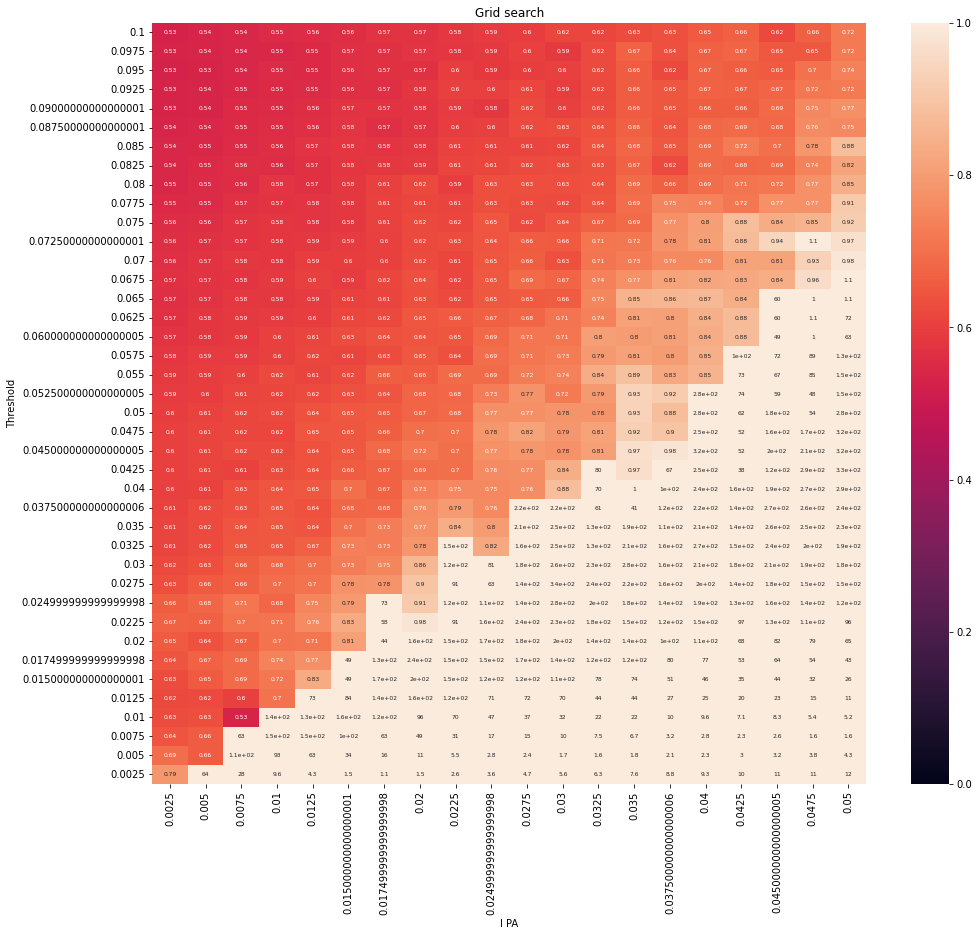

In [13]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 6}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')


In [14]:
plt.savefig('../output/tuning/grid_search2_communication_revised.eps', bbox_inches='tight', format='eps', dpi=1000)

<Figure size 432x288 with 0 Axes>

## 3. Select best fitting parameter combinations

In [19]:
sort_errors = result_m_error_2
opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]

# Save parameter combinations in csv
with open('../output/opt_pars_communication_revised.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)

opt_pars

[(0.01, 0.0025, 3.2418627972635804e-06),
 (0.0075, 0.005, 0.00015173514216477898),
 (0.01, 0.005, 0.00015973839224914853),
 (0.0125, 0.0025, 0.0004886141205992831),
 (0.0025, 0.017499999999999998, 0.0005397817735784347),
 (0.0075, 0.0025, 0.0005878638629863558),
 (0.0125, 0.005, 0.0008894829795916532),
 (0.005, 0.005, 0.0015125615332111449),
 (0.015000000000000001, 0.0025, 0.0015868483533125481),
 (0.01, 0.0075, 0.002062997562457886),
 (0.0125, 0.0075, 0.0022260153632777347),
 (0.005, 0.035, 0.0024064091603006902),
 (0.015000000000000001, 0.005, 0.0025013853499739162),
 (0.005, 0.0025, 0.0025167238387031293),
 (0.017499999999999998, 0.0025, 0.0028434305416862454),
 (0.005, 0.0325, 0.0028503521974654325),
 (0.0125, 0.01, 0.0031617020990171124),
 (0.0075, 0.0475, 0.0035446840696024186),
 (0.015000000000000001, 0.0075, 0.0036015284154296803),
 (0.017499999999999998, 0.005, 0.003800312230571192),
 (0.02, 0.0025, 0.003966577743943473),
 (0.0075, 0.05, 0.004125241549496527),
 (0.02, 0.005, 0

In [20]:
# Run with optimal params
result_error_3, result_errorY3_3, result_m_error_3,\
result_child3, result_cl3 = tuning.execute_set(param_set=opt_pars,
                                              t=2000,
                                              population_name='communication')

# Save model output to object
file = open('../output/tuning/com_output_error_revised_3.obj', 'wb')
pickle.dump(result_error_3, file)

file = open('../output/tuning/com_output_errorY3_revised_3.obj', 'wb')
pickle.dump(result_errorY3_3, file)

file = open('../output/tuning/com_output_m_error_revised_3.obj', 'wb')
pickle.dump(result_m_error_3, file)

file = open('../output/tuning/com_output_child_revised_3.obj', 'wb')
pickle.dump(result_child3, file)

file = open('../output/tuning/com_output_cl_revised_3.obj', 'wb')
pickle.dump(result_cl3, file)

thres_PA: 0.01 I_PA: 0.0025 error: 0.6281069621367164 0.45838877394167593 3.2418627972635804e-06 runtime: 21.43530797958374
thres_PA: 0.0075 I_PA: 0.005 error: 0.6595392541155158 0.5015337537443885 0.00015173514216477898 runtime: 19.493937253952026
thres_PA: 0.01 I_PA: 0.005 error: 0.6304554152453716 0.47122552585355104 0.00015973839224914853 runtime: 19.165758848190308
thres_PA: 0.0125 I_PA: 0.0025 error: 0.6181526719595288 0.44811644453797583 0.0004886141205992831 runtime: 19.3901469707489
thres_PA: 0.0025 I_PA: 0.017499999999999998 error: 1.127946850004682 0.7967923846985393 0.0005397817735784347 runtime: 19.93712306022644
thres_PA: 0.0075 I_PA: 0.0025 error: 0.6426386946543388 0.4776816412727559 0.0005878638629863558 runtime: 19.278111934661865
thres_PA: 0.0125 I_PA: 0.005 error: 0.6240699010042021 0.4638337215990109 0.0008894829795916532 runtime: 19.47813391685486
thres_PA: 0.005 I_PA: 0.005 error: 0.6591463923813563 0.5342185370259647 0.0015125615332111449 runtime: 19.10445380210

### 3.1 Select best fitting parameter combinations (overall mean)

In [21]:
sort_errors = result_m_error_2
opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]

# Save parameter combinations in csv
with open('../output/opt_pars_m_communication_revised.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)

opt_pars

[(0.01, 0.0025, 3.2418627972635804e-06),
 (0.0075, 0.005, 0.00015173514216477898),
 (0.01, 0.005, 0.00015973839224914853),
 (0.0125, 0.0025, 0.0004886141205992831),
 (0.0025, 0.017499999999999998, 0.0005397817735784347),
 (0.0075, 0.0025, 0.0005878638629863558),
 (0.0125, 0.005, 0.0008894829795916532),
 (0.005, 0.005, 0.0015125615332111449),
 (0.015000000000000001, 0.0025, 0.0015868483533125481),
 (0.01, 0.0075, 0.002062997562457886),
 (0.0125, 0.0075, 0.0022260153632777347),
 (0.005, 0.035, 0.0024064091603006902),
 (0.015000000000000001, 0.005, 0.0025013853499739162),
 (0.005, 0.0025, 0.0025167238387031293),
 (0.017499999999999998, 0.0025, 0.0028434305416862454),
 (0.005, 0.0325, 0.0028503521974654325),
 (0.0125, 0.01, 0.0031617020990171124),
 (0.0075, 0.0475, 0.0035446840696024186),
 (0.015000000000000001, 0.0075, 0.0036015284154296803),
 (0.017499999999999998, 0.005, 0.003800312230571192),
 (0.02, 0.0025, 0.003966577743943473),
 (0.0075, 0.05, 0.004125241549496527),
 (0.02, 0.005, 0

In [22]:
# Run with optimal params
result_error_3, result_errorY3_3, result_m_error_3,\
result_child3, result_cl3 = tuning.execute_set(param_set=opt_pars,
                                              t=2000,
                                              population_name='communication')

# Save model output to object
file = open('../output/tuning/com_output_error_revised_3_1.obj', 'wb')
pickle.dump(result_error_3, file)

file = open('../output/tuning/com_output_errorY3_revised_3_1.obj', 'wb')
pickle.dump(result_errorY3_3, file)

file = open('../output/tuning/com_output_m_error_revised_3_1.obj', 'wb')
pickle.dump(result_m_error_3, file)

file = open('../output/tuning/com_output_child_revised_3_1.obj', 'wb')
pickle.dump(result_child3, file)

file = open('../output/tuning/com_output_cl_revised_3_1.obj', 'wb')
pickle.dump(result_cl3, file)

thres_PA: 0.01 I_PA: 0.0025 error: 0.6281069621367164 0.45838877394167593 3.2418627972635804e-06 runtime: 23.31718397140503
thres_PA: 0.0075 I_PA: 0.005 error: 0.6595392541155158 0.5015337537443885 0.00015173514216477898 runtime: 21.83335781097412
thres_PA: 0.01 I_PA: 0.005 error: 0.6304554152453716 0.47122552585355104 0.00015973839224914853 runtime: 19.479506969451904
thres_PA: 0.0125 I_PA: 0.0025 error: 0.6181526719595288 0.44811644453797583 0.0004886141205992831 runtime: 19.317622900009155
thres_PA: 0.0025 I_PA: 0.017499999999999998 error: 1.127946850004682 0.7967923846985393 0.0005397817735784347 runtime: 20.00630497932434
thres_PA: 0.0075 I_PA: 0.0025 error: 0.6426386946543388 0.4776816412727559 0.0005878638629863558 runtime: 19.587157011032104
thres_PA: 0.0125 I_PA: 0.005 error: 0.6240699010042021 0.4638337215990109 0.0008894829795916532 runtime: 19.89397621154785
thres_PA: 0.005 I_PA: 0.005 error: 0.6591463923813563 0.5342185370259647 0.0015125615332111449 runtime: 19.5088193416

# Visualization of runs for checking


In [ ]:

opt_pars = []
opt_pars.append((0.15, 0.004))
opt_pars.append((0.0025, 0.02))
result_error3, result_errorY3_3, result_m_error3,\
result_child3, result_cl3 = tuning.execute_set(param_set=opt_pars,
                                                               t=2000,
                                                               population_name='communication')
by_run_com = []
for run in range(len(opt_pars)):
    by_run_com.append(pd.DataFrame(result_cl3[run]).mean(axis=1))

avg_nom = pd.concat(by_run_com, axis=1)

avg_nom.plot(figsize=((15, 10)))